## Wine Review Analysis
### Author: Ryan Berns
---

#### Load dataset and required packages

In [39]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
import numpy as np
import sklearn as sk
import sys
import statsmodels
from ggplot import ggplot
print(sys.version)

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]


In [40]:
base = pd.read_csv('~/Documents/Fordham/Text Analytics/Group Project/wineReview/winemag-data-130k-v2.txt',sep='\t')

In [41]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


### Summary Statistics

In [65]:
base.describe(include = 'all')

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,129971.000000,129908,129971,92506,129971.000000,120975.000000,129908,108724,50511,103727,98758,129971,129970,129971
unique,NaN,43,119955,37976,NaN,NaN,425,1229,17,19,15,118840,707,16757
top,NaN,US,"Seductively tart in lemon pith, cranberry and ...",Reserve,NaN,NaN,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,NaN,54504,3,2009,NaN,NaN,36247,4480,11065,25514,25514,11,13272,222
mean,64985.000000,NaN,NaN,NaN,88.447138,35.363389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,37519.540256,NaN,NaN,NaN,3.039730,41.022218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,32492.500000,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,64985.000000,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,97477.500000,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Top 10 Countries

In [43]:
topCountryL = base['country'].value_counts(ascending=False).reset_index().head(10)['index'].tolist()
topCountry = base[(base['country'].isin(topCountryL))]
base['country'].value_counts(ascending=False).head(10)

US           54504
France       22093
Italy        19540
Spain         6645
Portugal      5691
Chile         4472
Argentina     3800
Austria       3345
Australia     2329
Germany       2165
Name: country, dtype: int64

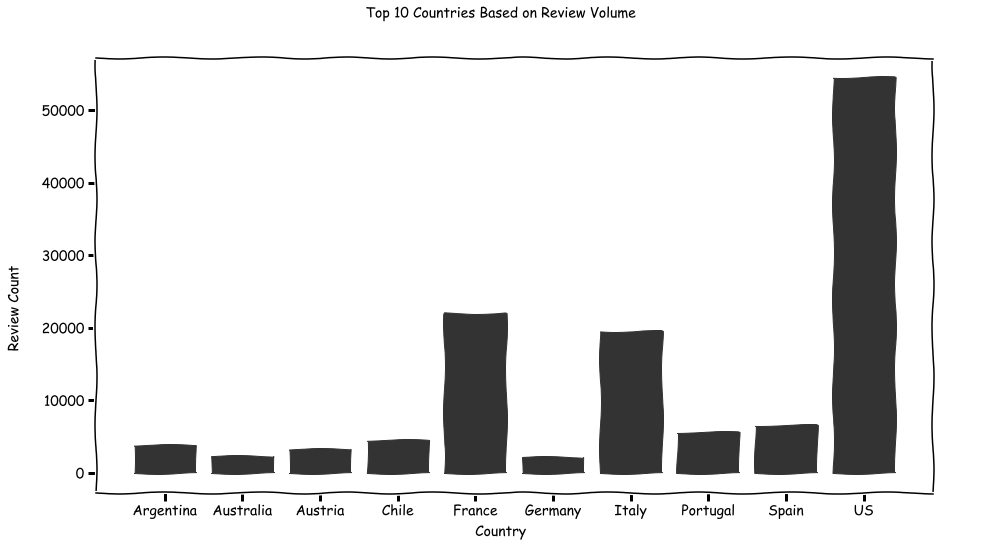

<ggplot: (-9223371953925185248)>

In [55]:
mpl.rcParams["figure.figsize"] = "15, 8"
ggplot(aes(x='factor(country)'), data=topCountry) + \
     geom_bar() + \
     xlab('Country') +\
     ylab('Review Count') +\
     ggtitle('Top 10 Countries Based on Review Volume') +\
     theme_xkcd()

#### Top Varieties

In [60]:
topVarietyL = base['variety'].value_counts(ascending=False).reset_index().head(10)['index'].tolist()
topVariety = base[(base['variety'].isin(topVarietyL))]
base['variety'].value_counts(ascending=False).head(10)

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Name: variety, dtype: int64

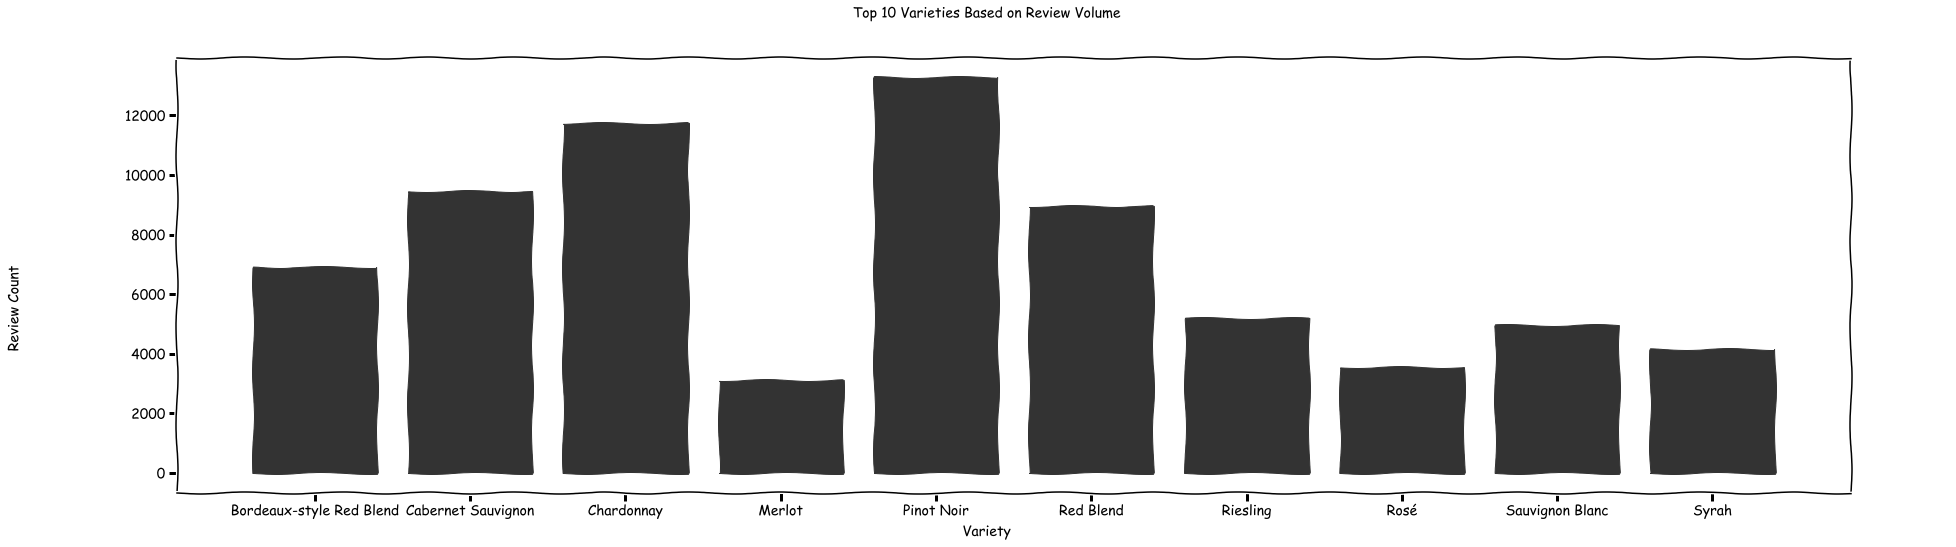

<ggplot: (82817971369)>

In [64]:
mpl.rcParams["figure.figsize"] = "30, 8"
ggplot(aes(x='factor(variety)'), data=topVariety) + \
     geom_bar() + \
     xlab('Variety') +\
     ylab('Review Count') +\
     ggtitle('Top 10 Varieties Based on Review Volume') +\
     theme_xkcd()

In [56]:
baseUS = base[(base['country']=="US")]
top15States = baseUS['province'].value_counts(ascending=False).reset_index().head(10)['index'].tolist()

In [57]:
basUSTop15 = baseUS[(baseUS['province'].isin(top15States))]

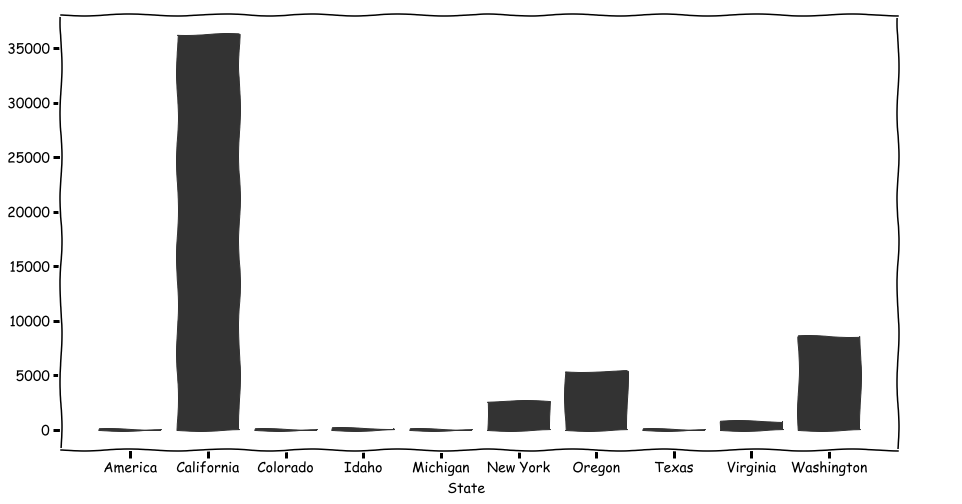

<ggplot: (82933613751)>

In [72]:
mpl.rcParams["figure.figsize"] = "15, 8"
ggplot(aes(x='factor(province)'), data=basUSTop15) + \
     geom_bar() + \
     xlab("State") +\
     theme_xkcd()

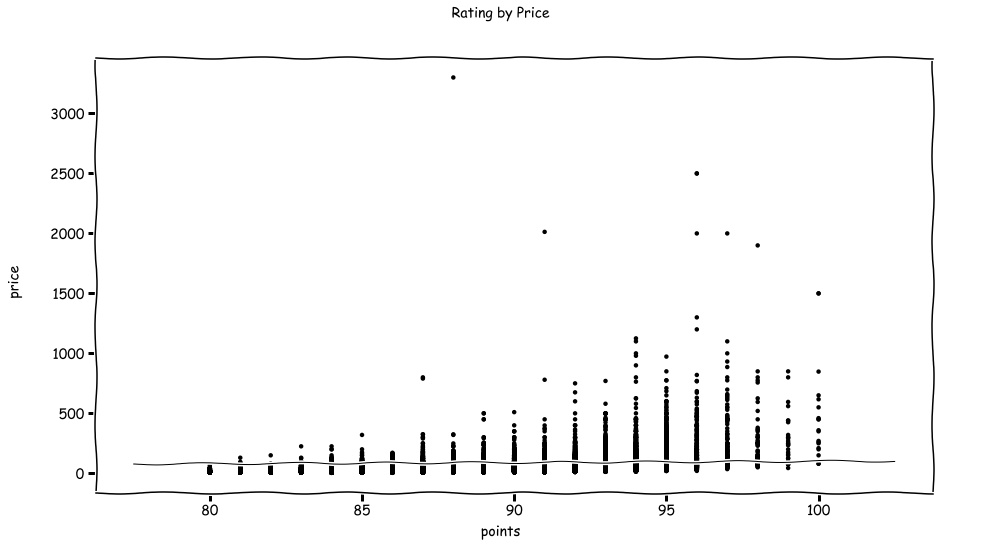

<ggplot: (82926127529)>

In [83]:
ggplot(base, aes('points', 'price')) + \
  geom_point(colour='steelblue') +\
    ggtitle('Rating by Price') +\
    geom_abline() +\
    theme_xkcd()

---
### Text Analysis

In [84]:
import nltk
from nltk import FreqDist

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(min_df=.0025, max_df=.1, stop_words='english')
tvec_weights = tvec.fit_transform(base['description'].dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(10)

,term,weight
467,fruits,0.019302
1089,sweet,0.018744
631,light,0.018511
286,crisp,0.018417
76,apple,0.018295
1117,texture,0.017567
139,blackberry,0.017137
1204,white,0.017094
233,citrus,0.016555
758,offers,0.016508


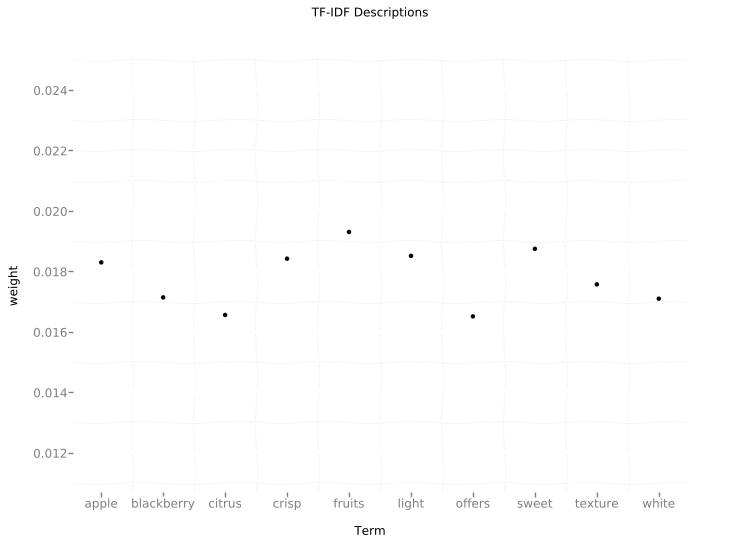

<ggplot: (82856608057)>

In [126]:
mpl.rcParams["figure.figsize"] = "10, 4"
test = weights_df.sort_values(by='weight', ascending=False).reset_index().head(10)
test.dtypes
ggplot(aes('factor(term)','weight'), data=test) +\
    geom_point() +\
    theme_bw() +\
    xlab('Term') +\
    ggtitle("TF-IDF Descriptions")

In [88]:
raw1 = base['description'].to_string()
raw = raw1.replace('\n',' ') 
tokens = nltk.word_tokenize(raw)
type(tokens)

list

In [89]:
#change all tokens into lower case 
words1 = [w.lower() for w in tokens]   #list comprehension 

#only keep text words, no numbers 
words2 = [w for w in words1 if w.isalpha()]

In [90]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english') #use the NLTK stopwords
words_nostopwords = [w for w in words2 if w not in stopwords]

In [91]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_words = []
for x in words_nostopwords:
    stemmed_words.append(ps.stem(x))

In [92]:
#generate a frequency dictionary for all tokens 
freq_nostw = FreqDist(stemmed_words)

#sort the frequency list in decending order
sorted_freq_nostw = sorted(freq_nostw.items(),key = lambda k:k[1], reverse = True)
for x in sorted_freq_nostw[0:10]:
    print(x[0],'\t',x[1])

wine 	 26235
aroma 	 20123
ripe 	 8009
blend 	 7406
fruit 	 6979
rich 	 5089
nose 	 5016
red 	 4274
dri 	 4198
note 	 4015


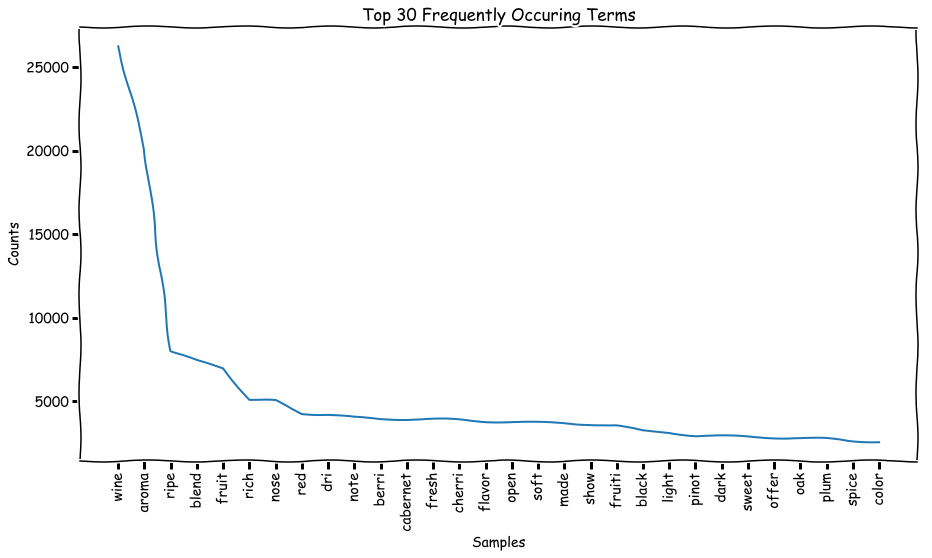

In [96]:
freq_nostw.plot(30,title="Top 30 Frequently Occuring Terms")